#### We have a list of lenders with their details and we are trying to predict if they will be able to pay off their loans or not
##### Following is the dataset:

- Loan_id : A unique loan (ID) assigned to each loan customers
- Loan_status : Whether a loan is paid off, not yet paid or paid off after the collection efforts
- Principal : The loan amount for each customer
- Terms : Schedule(time period to repay)
- Effective_date : Loan start date
- Due_date : When loan should be paid off
- Paidoff_time : Actual time when loan was paid off , null means yet to be paid
- Past_due_days : How many times(days) a loan has past its due date
- Age : Age of customer
- Education : Education level of customer applied for loan
- Gender : Male/Female

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../Loan payments data.csv')

In [3]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [5]:
import seaborn as sns

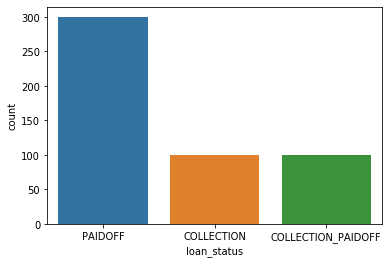

In [6]:
sns.countplot(data['loan_status'])

In [7]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [8]:
# number of unique data in its respective column
{column: len(data[column].unique()) for column in data.columns}

{'Loan_ID': 500,
 'loan_status': 3,
 'Principal': 6,
 'terms': 3,
 'effective_date': 7,
 'due_date': 25,
 'paid_off_time': 321,
 'past_due_days': 34,
 'age': 33,
 'education': 4,
 'Gender': 2}

In [9]:
# assigning code to category columns

def bin_code(df,column,positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def order_code(df,column,order):
    df = df.copy()
    df[column] = df[column].apply(lambda x: order.index(x))
    return df


In [10]:
def loan_inputs(df):
    df = df.copy()
    
    # getting rid of column we dont need
    df = df.drop('Loan_ID',axis=1)
    
    # timestamps for each date column
    for column in ['effective_date','due_date','paid_off_time']:
        df[column] = pd.to_datetime(df[column])
    
    df['effective_year'] = df['effective_date'].apply(lambda x: x.year)
    df['effective_month'] = df['effective_date'].apply(lambda x: x.month)
    df['effective_day'] = df['effective_date'].apply(lambda x: x.day)
    
    df['due_year'] = df['due_date'].apply(lambda x: x.year)
    df['due_month'] = df['due_date'].apply(lambda x: x.month)
    df['due_day'] = df['due_date'].apply(lambda x: x.day)
    
    df['paid_off_year'] = df['paid_off_time'].apply(lambda x: x.year)
    df['paid_off_month'] = df['paid_off_time'].apply(lambda x: x.month)
    df['paid_off_day'] = df['paid_off_time'].apply(lambda x: x.day)
    df['paid_off_hour'] = df['paid_off_time'].apply(lambda x: x.hour)
    
    df=df.drop(['effective_date','due_date','paid_off_time'],axis=1)
    
    # fill in the missing data for timestamps
    for column in ['paid_off_year','paid_off_month','paid_off_day','paid_off_hour','past_due_days']:
        df[column] = df[column].fillna(df[column].mean())
    
    # standardising the categorical data column - gender
    df = bin_code(df,'Gender',positive_value='male')
    
    # standardising the categorical data column - education
    education_order = ['High School or Below', 'college','Bechalor', 'Master or Above']
    df = order_code(df,'education',order=education_order)
    
  
    mapping = {
                'COLLECTION': 0,
                'PAIDOFF' : 1,
                'COLLECTION_PAIDOFF': 2
    }
    df['loan_status'] = df['loan_status'].replace(mapping)
    
      # splitting X (independent) and y(dependent)
    y = df['loan_status'].copy()
    X = df.drop('loan_status', axis=1).copy()
    
    return X, y

In [11]:
X, y = loan_inputs(data)

In [12]:
X.head()

,Principal,terms,past_due_days,age,education,Gender,effective_year,effective_month,effective_day,due_year,due_month,due_day,paid_off_year,paid_off_month,paid_off_day,paid_off_hour
0,1000,30,36.01,45,0,1,2016,9,8,2016,10,7,2016.0,9.0,14.0,19.0
1,1000,30,36.01,50,2,0,2016,9,8,2016,10,7,2016.0,10.0,7.0,9.0
2,1000,30,36.01,33,2,0,2016,9,8,2016,10,7,2016.0,9.0,25.0,16.0
3,1000,15,36.01,27,1,1,2016,9,8,2016,9,22,2016.0,9.0,22.0,20.0
4,1000,30,36.01,28,1,0,2016,9,9,2016,10,8,2016.0,9.0,23.0,21.0


In [13]:
y.unique()

array([1, 0, 2], dtype=int64)



After converting our required data to numeric values, we will have to standardize the data to be able to compare and make meaningful interpretations. like an apple to apple comparision.

So we use the Scaler funtion.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [16]:
# check the unique number of value in our dataset X, all the columns with 1 as the value hold no importance in our dataset, 
#so we drop them

{column: len(X[column].unique()) for column in X.columns}

{'Principal': 6,
 'terms': 3,
 'past_due_days': 34,
 'age': 33,
 'education': 4,
 'Gender': 2,
 'effective_year': 1,
 'effective_month': 1,
 'effective_day': 7,
 'due_year': 1,
 'due_month': 3,
 'due_day': 19,
 'paid_off_year': 1,
 'paid_off_month': 5,
 'paid_off_day': 32,
 'paid_off_hour': 24}

In [17]:
X.drop(['effective_year','effective_month','due_year','paid_off_year'],axis=1,inplace=True)

In [18]:
X.tail()

,Principal,terms,past_due_days,age,education,Gender,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour
495,0.493377,0.897891,-1.780899,-0.512610,-1.022825,0.426653,0.540875,0.664986,-0.762531,0.690066,-0.463997,1.339835
496,0.493377,-0.978972,-1.187446,-0.841628,-1.022825,0.426653,0.540875,-1.094236,1.264758,0.690066,-1.042187,1.581030
497,-1.243866,-0.978972,-1.780899,-0.183592,0.374477,0.426653,0.540875,-1.094236,1.264758,-1.035098,1.704214,-0.589721
498,0.493377,0.897891,-1.888799,1.132480,0.374477,-2.343823,0.540875,2.424209,-0.897684,2.415229,-0.897640,2.063419
499,0.493377,0.897891,-1.511147,-0.512610,-1.022825,0.426653,0.540875,0.664986,-0.762531,0.690066,0.258740,-0.589721


#### Train Test split

In this section we are splitting our data in training and testing by assigning a text size of 0.4 and a random state of 101

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=101)

#### Training the model

We are applying 3 kinds of algorithms to predict the efficiency of our training on our testing data. The 3 methods being Logistic Regression, Decision Tree and Random Forest.


In [21]:
# the models we will use in our case are : Logistic regression, Decion Tree and RandomForest

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:

log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predictions & Evaluations

Here is the part where we check how well our models did. 

In [23]:
print('Logistic Regression' + ': {:.2f}%'.format(log_reg.score(X_test, y_test) * 100))
print('Decision Tree' + ': {:.2f}%'.format(dt.score(X_test, y_test) * 100))
print('Random Forest' + ': {:.2f}%'.format(rf.score(X_test, y_test) * 100))

Logistic Regression: 97.50%
Decision Tree: 99.50%
Random Forest: 99.50%


In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
pred_log_reg = log_reg.predict(X_test)
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)

In [26]:
print(confusion_matrix(y_test,pred_log_reg))
print('\n')
print(classification_report(y_test,pred_log_reg))

[[ 31   3   0]
 [  1 129   0]
 [  0   1  35]]


              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.97      0.99      0.98       130
           2       1.00      0.97      0.99        36

    accuracy                           0.97       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.98      0.97      0.97       200



In [27]:
print(confusion_matrix(y_test,pred_dt))
print('\n')
print(classification_report(y_test,pred_dt))

[[ 33   0   1]
 [  0 130   0]
 [  0   0  36]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       1.00      1.00      1.00       130
           2       0.97      1.00      0.99        36

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [28]:
print(confusion_matrix(y_test,pred_rf))
print('\n')
print(classification_report(y_test,pred_rf))

[[ 34   0   0]
 [  0 130   0]
 [  0   1  35]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.99      1.00      1.00       130
           2       1.00      0.97      0.99        36

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



#### Findings:


Our predictions using Decision Tree and Random Forest are more accurate compared to that of Logistic regression.
With the help of the 2 algorithms we can say that the customers who are yet to repay the loan will be able to pay. 

We have based our loan status(i.e. the different kinds of customers who have paid, paid after collections and not yet paid) on the parameters like - the sum of money they have borrowed, the term of the loan, age of the customer, their education background, if they have on previous ocassions past a due date etc. 

After putting these parameters into our model we derived at the results, where the f1 scores and accuracy was higher when we used decision tree and random forest as the algorithms.

However, it would be more meaningful to use a larger set of data to prove if customers will repay or not, because this dataset was limited to the borrowing behaviour of 500 customers.